# Advanced Pairs Trading : Kalman Filters

## Import library

In [1]:
import sys
sys.path.append('../../')

In [2]:
from util.load_data import *
from config.constants import *
import statsmodels.api as sm
import quantstats as qs
import numpy as np
from pykalman import KalmanFilter
import pandas as pd
import matplotlib.pyplot as plt
from Kalman_Filter import Kalman_Filter
from util.Save_result_return import save_to_csv

In [3]:
import pandas as pd
pd.options.mode.chained_assignment = None

## Getting the Data

In [4]:
XAUUSD = load_data()

## Class Kalman Filter

## Currency_Pair

In [5]:
Currency_Pair = 'GBPUSD'

## TF D1

In [6]:
TF = 'D1'

In [7]:
data_1 = XAUUSD[TF]

In [8]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

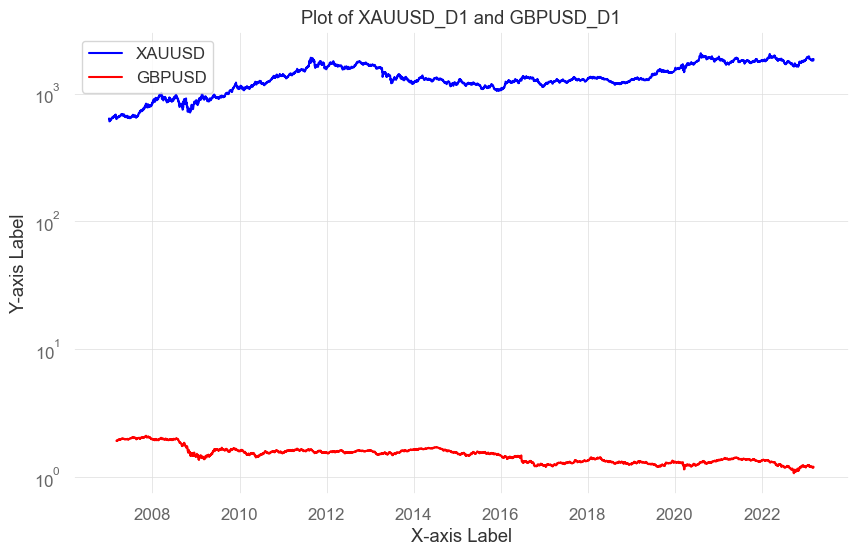

In [9]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [10]:
KF = Kalman_Filter(data_1.loc['2007-03-05':'2023-03-01'],data_2.loc['2007-03-05':'2023-03-01'])

In [11]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.888
Model:                            OLS   Adj. R-squared (uncentered):              0.887
Method:                 Least Squares   F-statistic:                          3.946e+04
Date:                Mon, 04 Mar 2024   Prob (F-statistic):                        0.00
Time:                        08:59:49   Log-Likelihood:                         -37836.
No. Observations:                5003   AIC:                                  7.567e+04
Df Residuals:                    5002   BIC:                                  7.568e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close        866.0557      4.360    198.653      0.000     857.509     874.603
==============================================================================
Omnibus:                      212.289   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.695
Skew:                          -0.536   Prob(JB):                     8.93e-53
Kurtosis:                       3.027   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
result = KF.Run()

In [13]:
KF.print_performance()

----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Multiple (Strategy):         0.875862
Multiple (Buy-and-Hold):     3.702206
--------------------------------------
Out-/Underperformance:       -2.826344


CAGR:                        -0.008256
Annualized Mean:             -0.00829
Annualized Std:              0.026607
Sharpe Ratio:                -0.311562
Sortino Ratio:               -0.416984
Maximum Drawdown:            0.188067
Calmar Ratio:                -0.043897
Max Drawdown Duration:       5697 Days
Kelly Criterion:             -11.22337


### Save Result Backtest 

In [14]:
result
data = result[['Equity', 'Returns', 'stock1_signal', 'stock2_signal']].copy()

In [15]:
filename = f'{Currency_Pair}_{TF}.csv'

In [16]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-06
End Period                 2023-03-01
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -12.91%
CAGR﹪                     -0.59%

Sharpe                     -0.28
Prob. Sharpe Ratio         10.49%
Smart Sharpe               -0.28
Sortino                    -0.37
Smart Sortino              -0.37
Sortino/√2                 -0.26
Smart Sortino/√2           -0.26
Omega                      0.95

Max Drawdown               -19.12%
Longest DD Days            5697
Volatility (ann.)          2.39%
Calmar                     -0.03
Skew                       -0.78
Kurtosis                   9.32

Expected Daily %           -0.0%
Expected Monthly %         -0.07%
Expected Yearly %          -0.81%
Kelly Criterion            -2.71%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.25%
Expected Shortfall (cVaR)  -0.25%

Max Consecutiv

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-07-27,2019-06-19,2023-03-01,5697,-19.118840,-18.495388
2,2007-04-03,2007-04-09,2007-04-16,14,-0.249490,-0.230301
3,2007-05-02,2007-05-04,2007-05-23,22,-0.208362,-0.205612
4,2007-05-25,2007-06-01,2007-06-19,26,-0.192154,-0.189824
5,2007-07-18,2007-07-19,2007-07-25,8,-0.123811,-0.112569


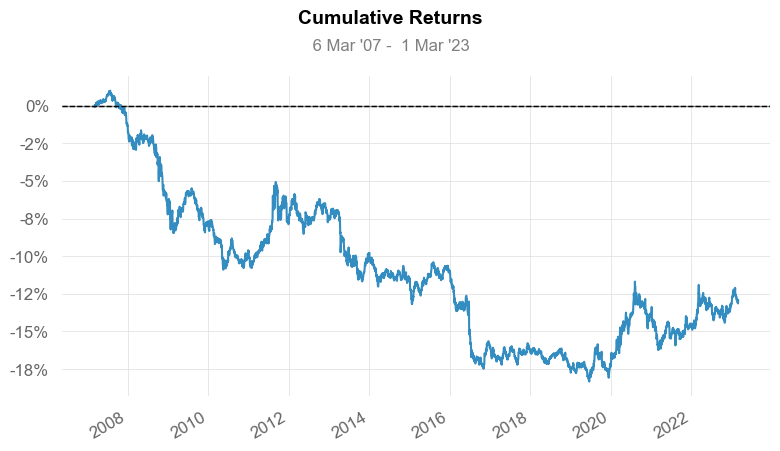

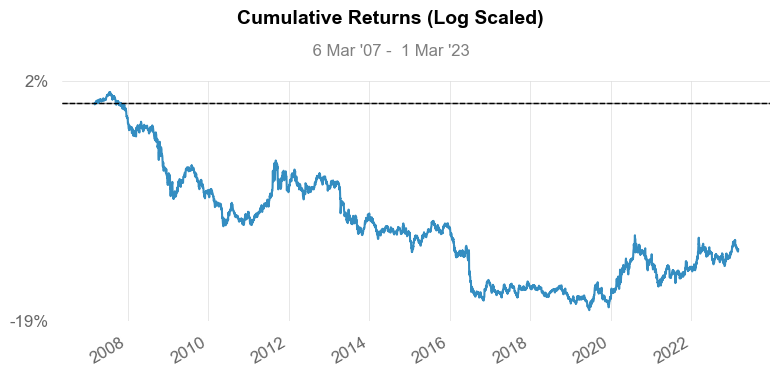

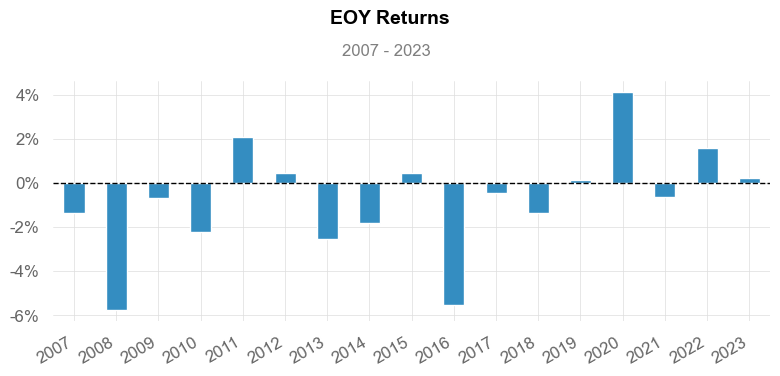

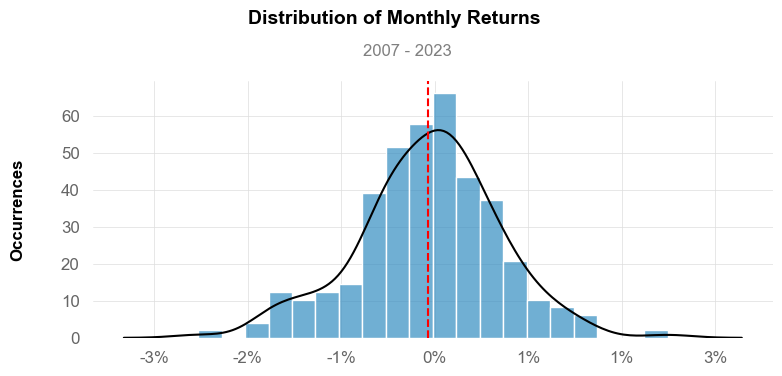

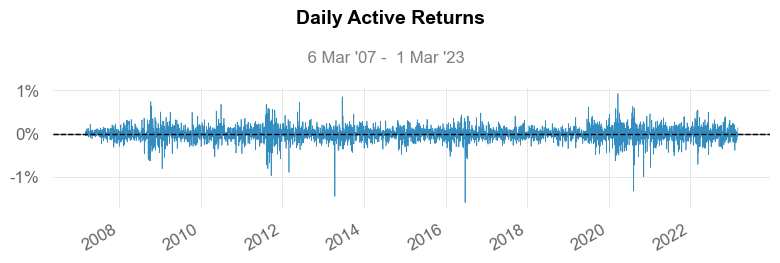

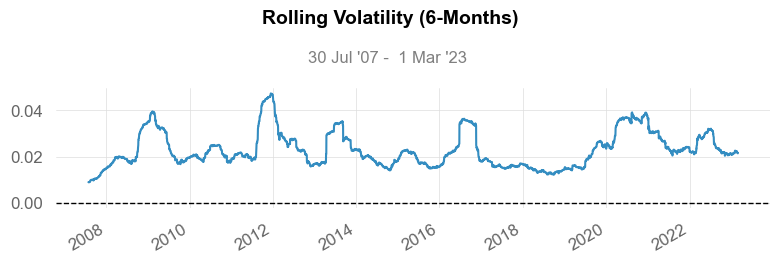

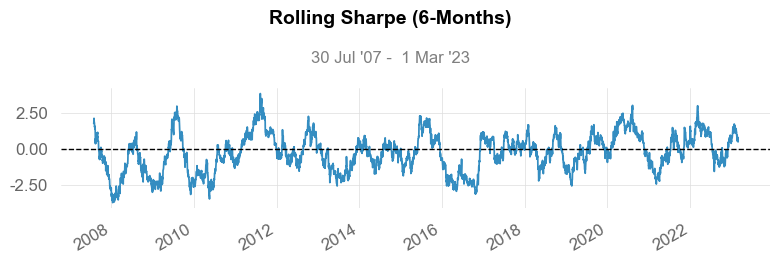

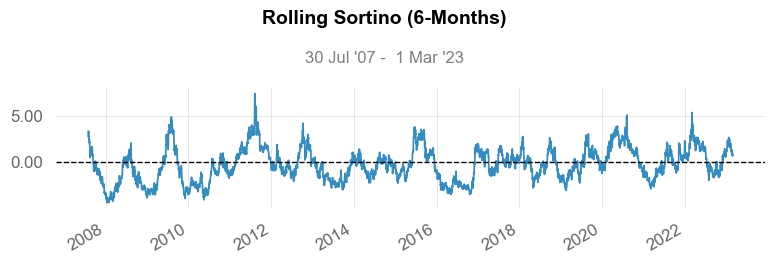

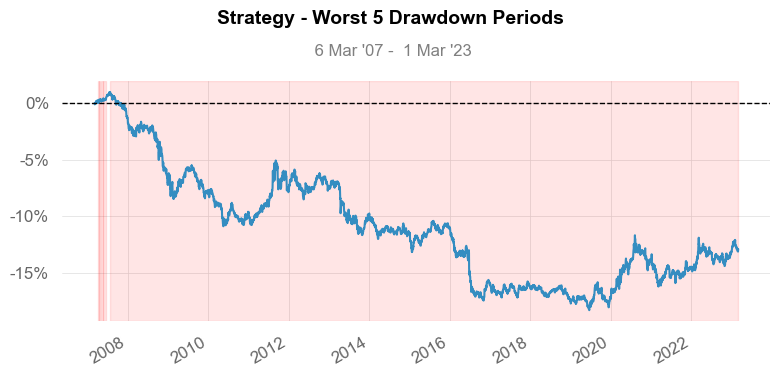

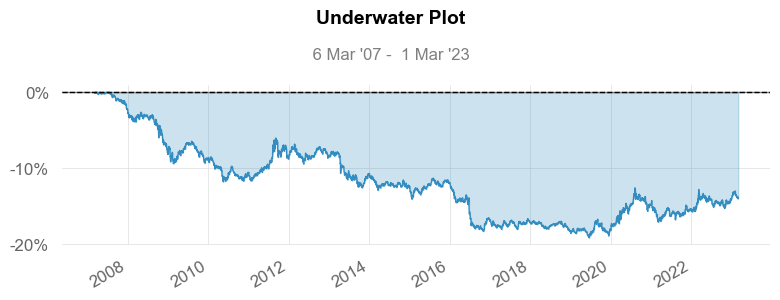

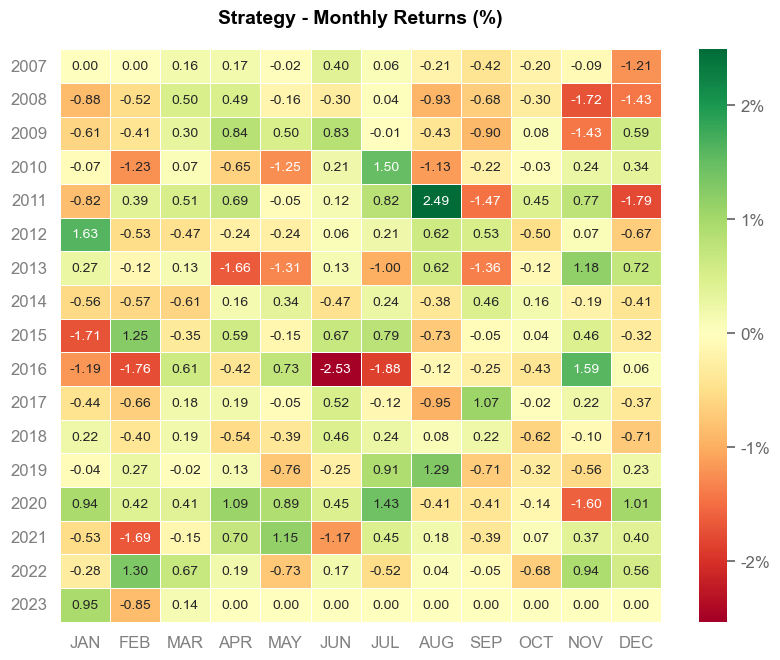

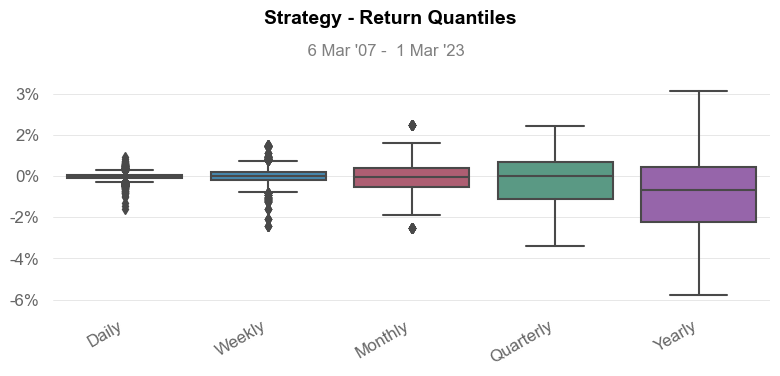

In [17]:
qs.reports.full(result['Equity'].resample('D').last().dropna().pct_change())

## TF H4

In [18]:
TF = 'H4'

In [19]:
data_1 = XAUUSD[TF]

In [20]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

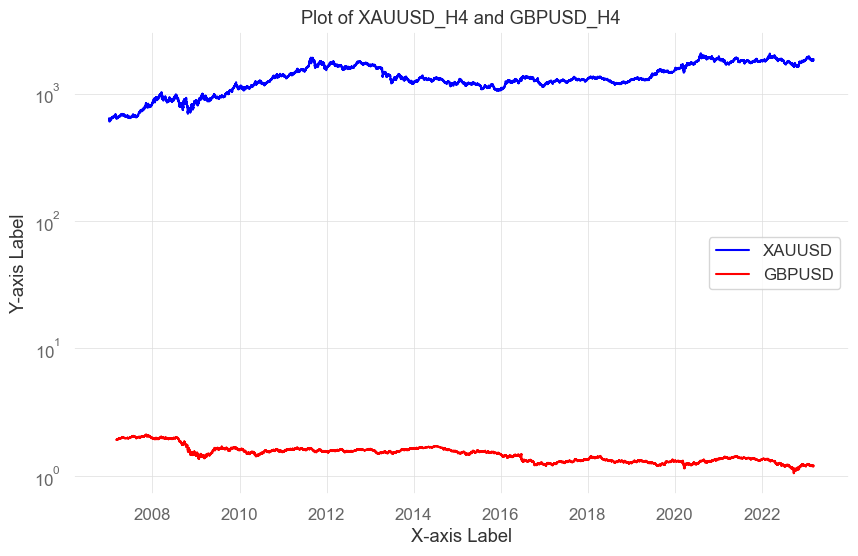

In [21]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [22]:
KF = Kalman_Filter(data_1.loc['2007-03-05':'2023-03-01'],data_2.loc['2007-03-05':'2023-03-01'])

In [23]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.887
Model:                            OLS   Adj. R-squared (uncentered):              0.887
Method:                 Least Squares   F-statistic:                          2.032e+05
Date:                Mon, 04 Mar 2024   Prob (F-statistic):                        0.00
Time:                        09:00:30   Log-Likelihood:                     -1.9516e+05
No. Observations:               25804   AIC:                                  3.903e+05
Df Residuals:                   25803   BIC:                                  3.903e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close        865.7607      1.920    450.825      0.000     861.997     869.525
==============================================================================
Omnibus:                     1093.447   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1238.569
Skew:                          -0.537   Prob(JB):                    1.12e-269
Kurtosis:                       3.024   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
result = KF.Run()

In [25]:
KF.print_performance()

----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Multiple (Strategy):         0.871476
Multiple (Buy-and-Hold):     3.652704
--------------------------------------
Out-/Underperformance:       -2.781228


CAGR:                        -0.008567
Annualized Mean:             -0.008604
Annualized Std:              0.027012
Sharpe Ratio:                -0.318521
Sortino Ratio:               -0.43548
Maximum Drawdown:            0.193207
Calmar Ratio:                -0.044341
Max Drawdown Duration:       5697 Days
Kelly Criterion:             -11.302437


### Save Result Backtest 

In [26]:
result
data = result[['Equity', 'Returns', 'stock1_signal', 'stock2_signal']].copy()

In [27]:
filename = f'{Currency_Pair}_{TF}.csv'

In [28]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-06
End Period                 2023-03-01
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -13.4%
CAGR﹪                     -0.62%

Sharpe                     -0.29
Prob. Sharpe Ratio         9.69%
Smart Sharpe               -0.29
Sortino                    -0.39
Smart Sortino              -0.38
Sortino/√2                 -0.27
Smart Sortino/√2           -0.27
Omega                      0.95

Max Drawdown               -19.61%
Longest DD Days            5697
Volatility (ann.)          2.4%
Calmar                     -0.03
Skew                       -0.77
Kurtosis                   9.33

Expected Daily %           -0.0%
Expected Monthly %         -0.07%
Expected Yearly %          -0.84%
Kelly Criterion            -2.81%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.25%
Expected Shortfall (cVaR)  -0.25%

Max Consecutive W

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-07-27,2019-06-18,2023-03-01,5697,-19.613583,-18.894044
2,2007-04-03,2007-04-09,2007-04-16,14,-0.249374,-0.230194
3,2007-05-02,2007-05-04,2007-05-23,22,-0.208265,-0.205516
4,2007-05-25,2007-06-01,2007-06-19,26,-0.192065,-0.189736
5,2007-07-18,2007-07-19,2007-07-25,8,-0.123753,-0.112517


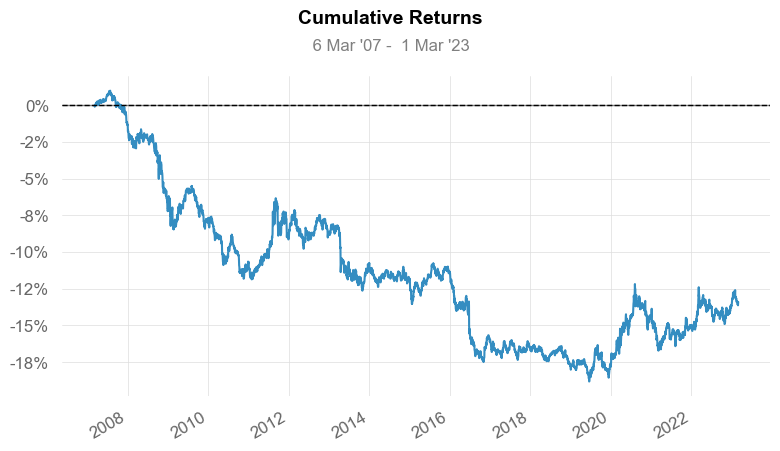

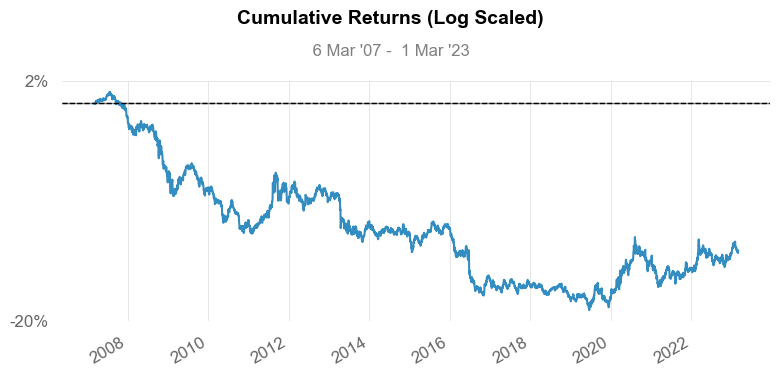

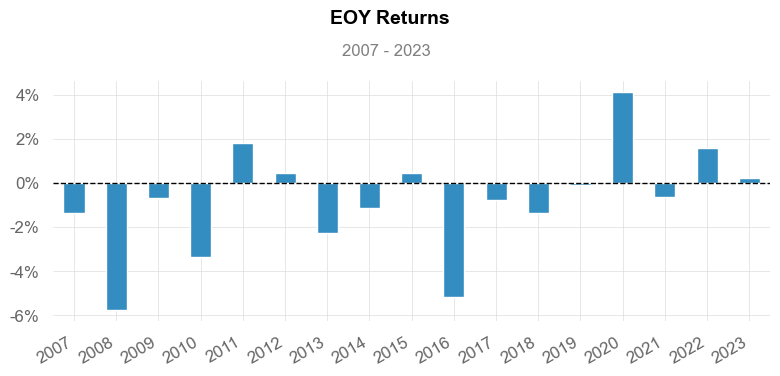

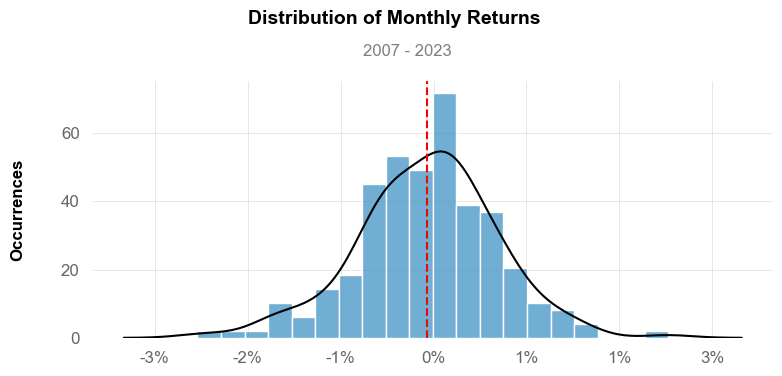

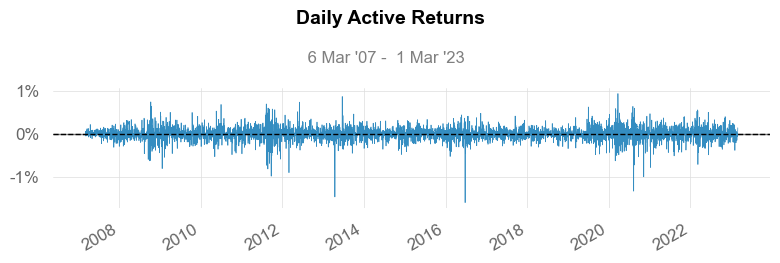

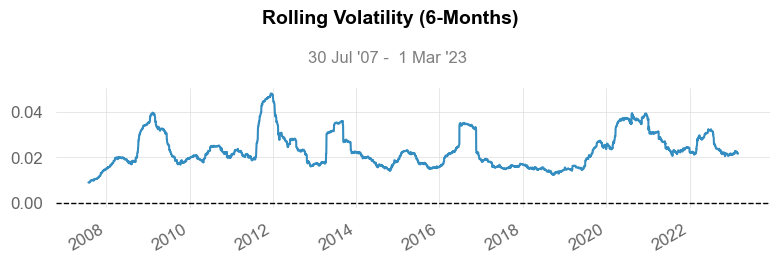

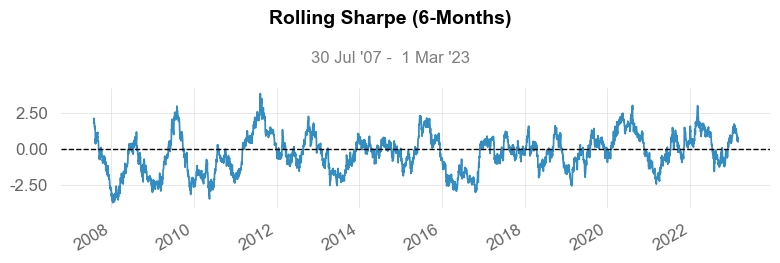

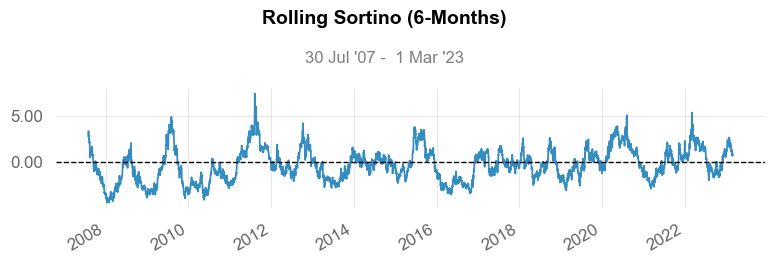

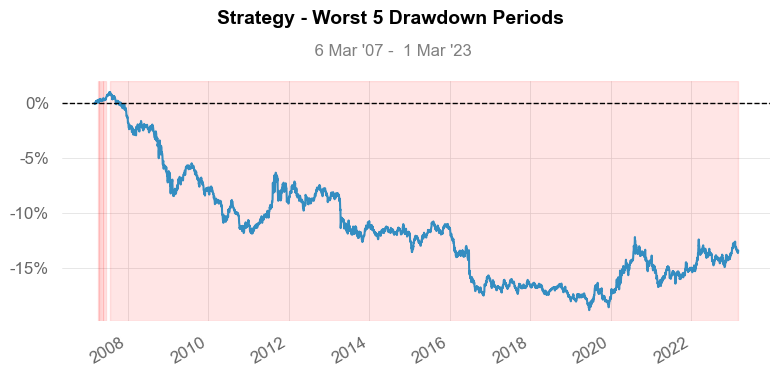

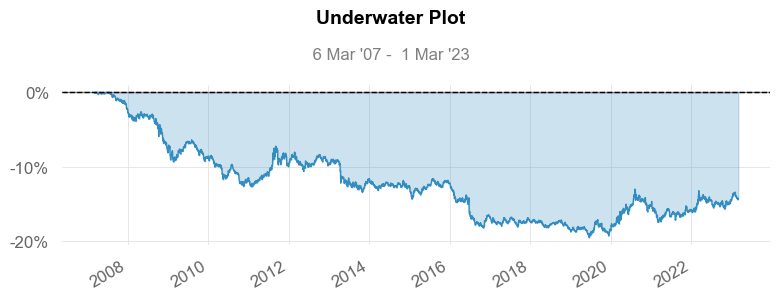

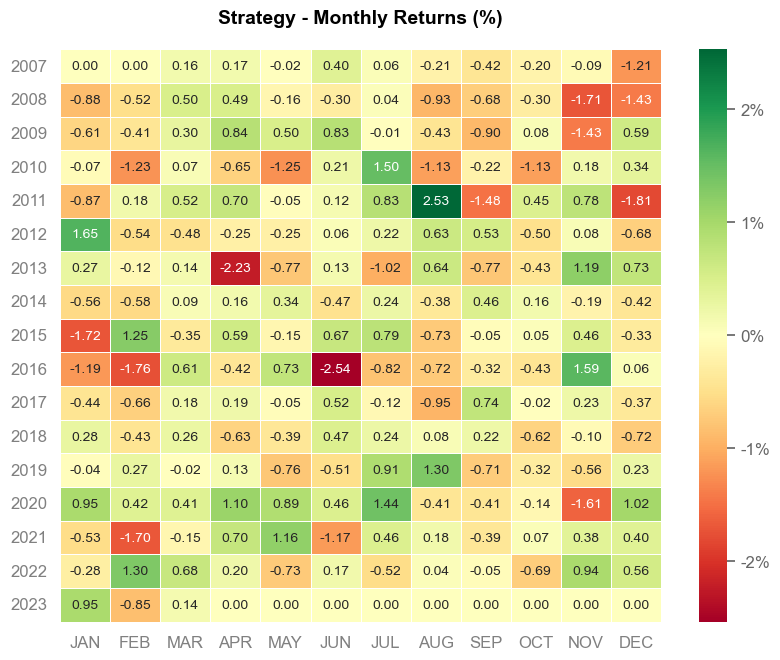

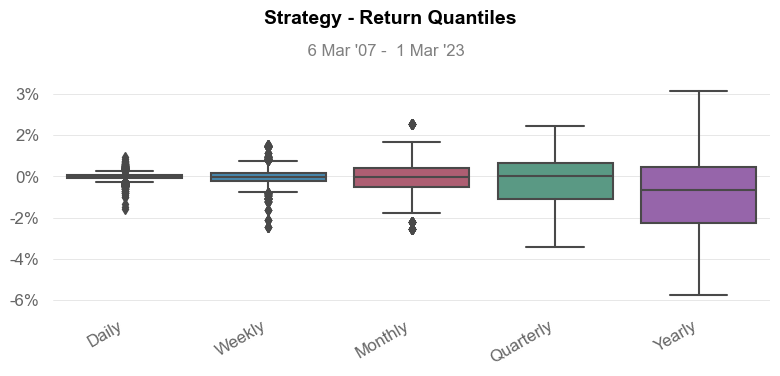

In [29]:
qs.reports.full(result['Equity'].resample('D').last().dropna().pct_change())

## TF H1

In [30]:
TF = 'H1'

In [31]:
data_1 = XAUUSD[TF]

In [32]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

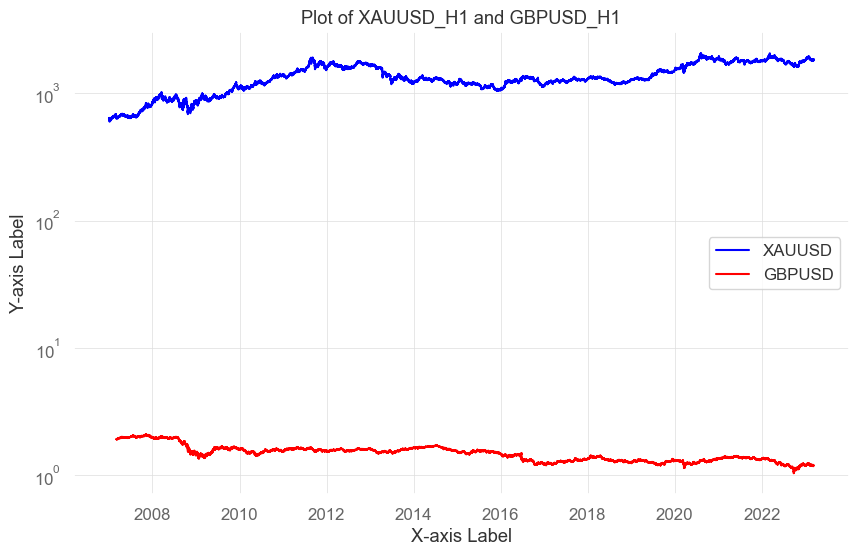

In [33]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [34]:
KF = Kalman_Filter(data_1.loc['2007-03-05':'2023-03-01'],data_2.loc['2007-03-05':'2023-03-01'])

In [35]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.887
Model:                            OLS   Adj. R-squared (uncentered):              0.887
Method:                 Least Squares   F-statistic:                          7.862e+05
Date:                Mon, 04 Mar 2024   Prob (F-statistic):                        0.00
Time:                        09:02:25   Log-Likelihood:                     -7.5516e+05
No. Observations:               99844   AIC:                                  1.510e+06
Df Residuals:                   99843   BIC:                                  1.510e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close        865.6852      0.976    886.695      0.000     863.772     867.599
==============================================================================
Omnibus:                     4225.965   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4789.007
Skew:                          -0.536   Prob(JB):                         0.00
Kurtosis:                       3.024   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
result = KF.Run()

### Save Result Backtest 

In [37]:
result
data = result[['Equity', 'Returns', 'stock1_signal', 'stock2_signal']].copy()

In [38]:
filename = f'{Currency_Pair}_{TF}.csv'

In [39]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-06
End Period                 2023-03-01
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -13.2%
CAGR﹪                     -0.61%

Sharpe                     -0.29
Prob. Sharpe Ratio         10.05%
Smart Sharpe               -0.28
Sortino                    -0.38
Smart Sortino              -0.38
Sortino/√2                 -0.27
Smart Sortino/√2           -0.27
Omega                      0.95

Max Drawdown               -19.51%
Longest DD Days            5697
Volatility (ann.)          2.4%
Calmar                     -0.03
Skew                       -0.79
Kurtosis                   9.64

Expected Daily %           -0.0%
Expected Monthly %         -0.07%
Expected Yearly %          -0.83%
Kelly Criterion            -2.76%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.25%
Expected Shortfall (cVaR)  -0.25%

Max Consecutive 

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-07-27,2019-06-18,2023-03-01,5697,-19.513596,-18.700226
2,2007-04-03,2007-04-09,2007-04-16,14,-0.249374,-0.230194
3,2007-05-02,2007-05-04,2007-05-23,22,-0.208265,-0.205516
4,2007-05-25,2007-06-01,2007-06-19,26,-0.192065,-0.189736
5,2007-07-18,2007-07-19,2007-07-25,8,-0.123753,-0.112517


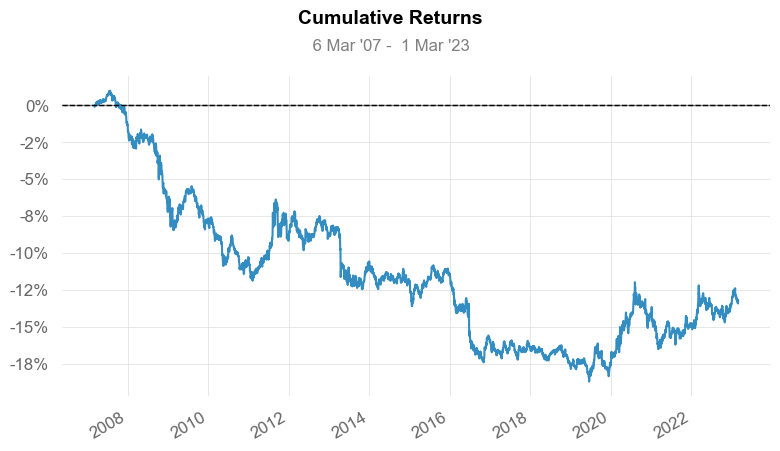

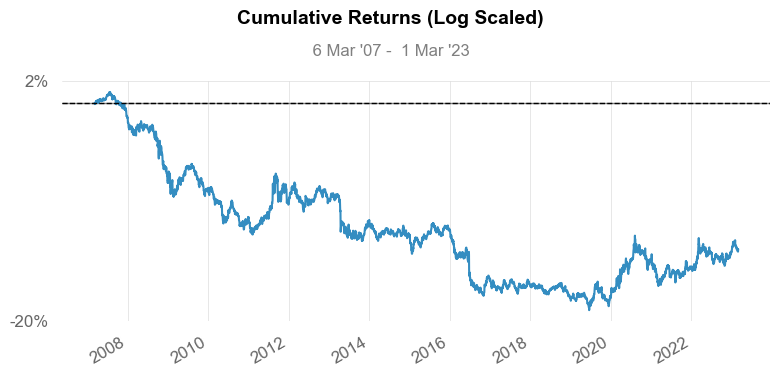

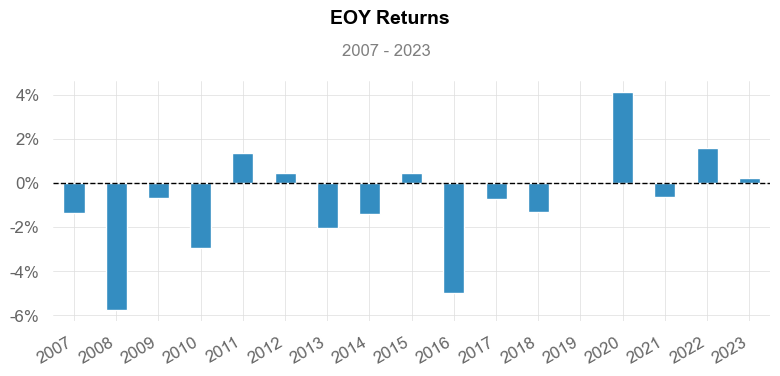

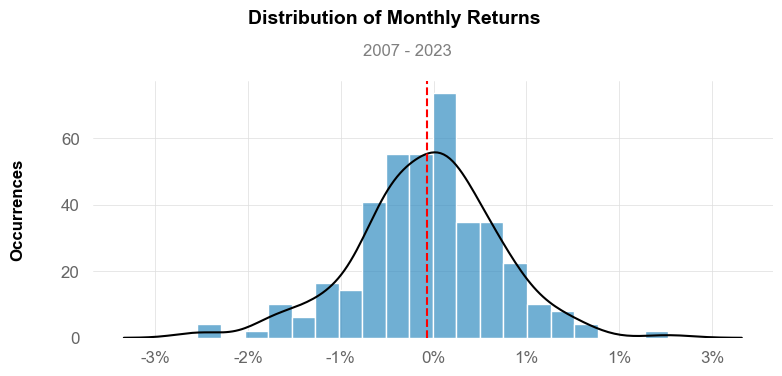

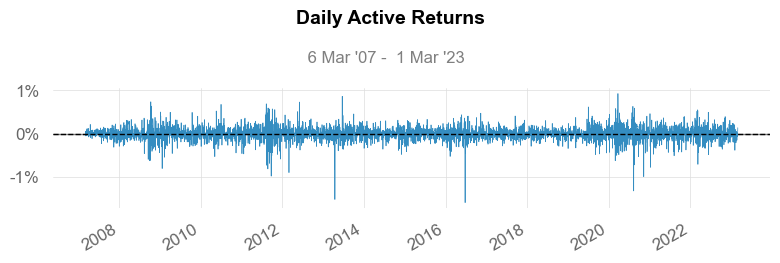

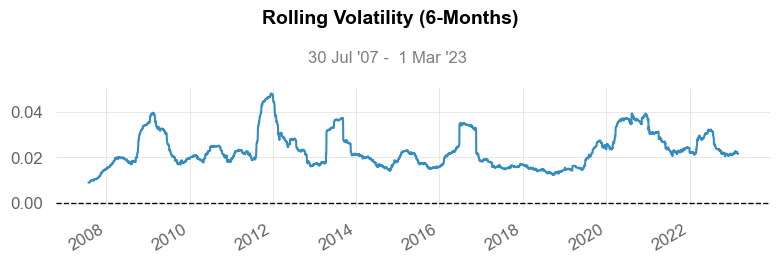

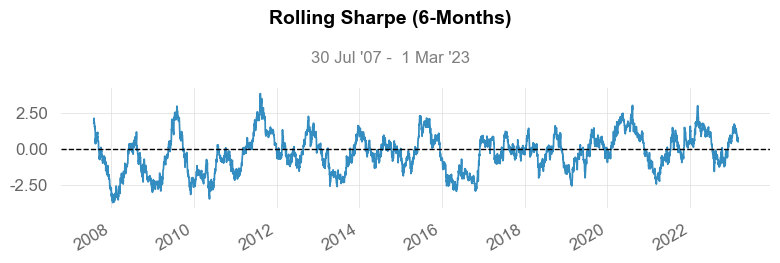

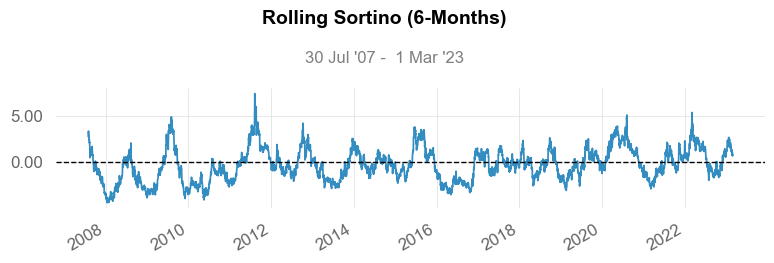

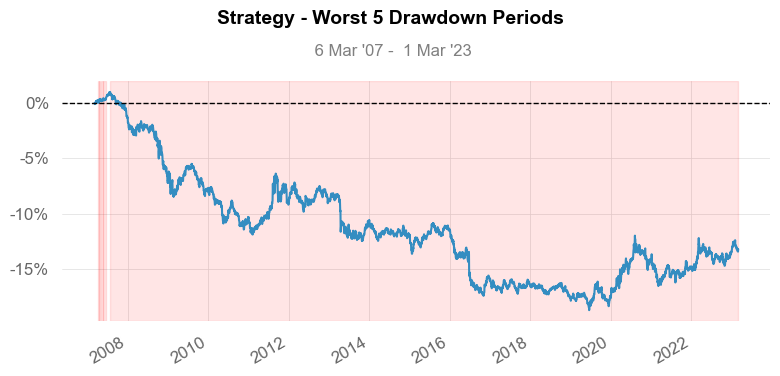

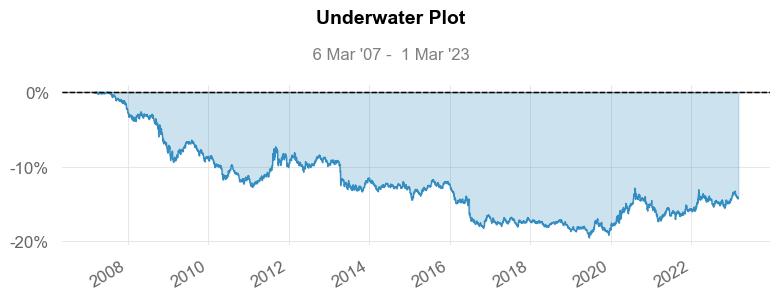

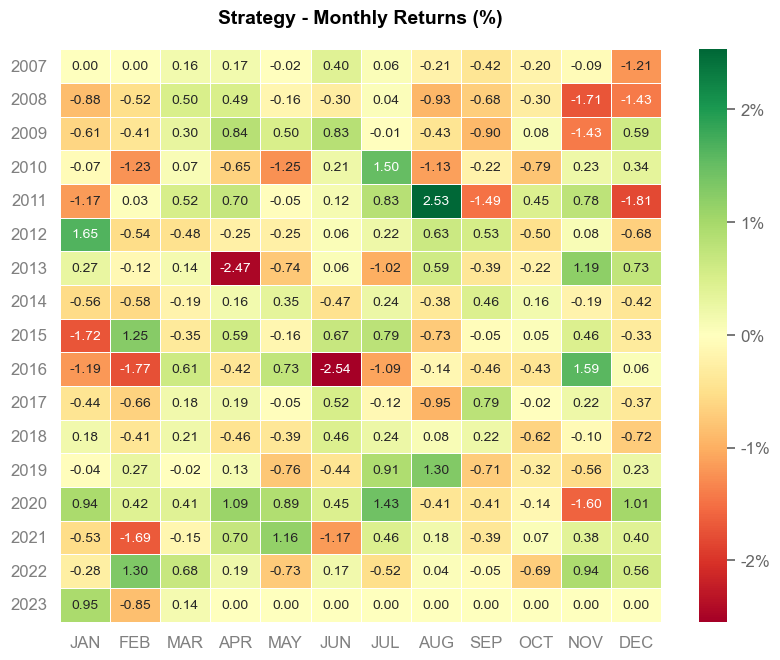

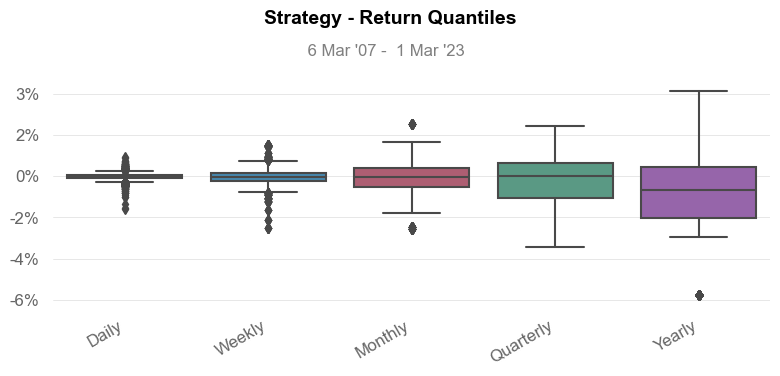

In [40]:
qs.reports.full(result['Equity'].resample('D').last().dropna().pct_change().resample('D').last().dropna())

## TF H30

In [41]:
TF = 'M30'

In [42]:
data_1 = XAUUSD[TF]

In [43]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

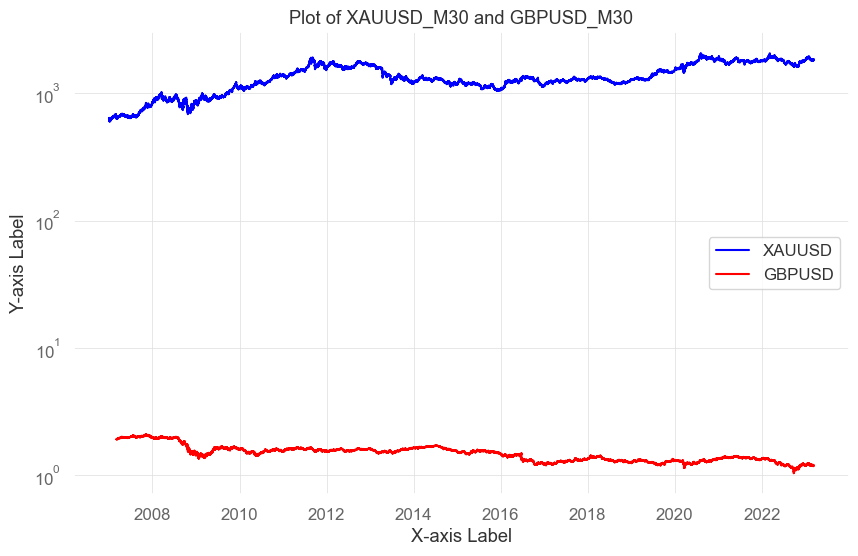

In [44]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [45]:
KF = Kalman_Filter(data_1.loc['2007-03-05':'2023-03-01'],data_2.loc['2007-03-05':'2023-03-01'])

In [46]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.887
Model:                            OLS   Adj. R-squared (uncentered):              0.887
Method:                 Least Squares   F-statistic:                          1.572e+06
Date:                Mon, 04 Mar 2024   Prob (F-statistic):                        0.00
Time:                        09:08:44   Log-Likelihood:                     -1.5102e+06
No. Observations:              199676   AIC:                                  3.020e+06
Df Residuals:                  199675   BIC:                                  3.020e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close        865.6810      0.690   1253.932      0.000     864.328     867.034
==============================================================================
Omnibus:                     8450.875   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9577.741
Skew:                          -0.536   Prob(JB):                         0.00
Kurtosis:                       3.024   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
result = KF.Run()

### Save Result Backtest 

In [48]:
result
data = result[['Equity', 'Returns', 'stock1_signal', 'stock2_signal']].copy()

In [49]:
filename = f'{Currency_Pair}_{TF}.csv'

In [50]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-06
End Period                 2023-03-01
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -13.4%
CAGR﹪                     -0.62%

Sharpe                     -0.29
Prob. Sharpe Ratio         9.75%
Smart Sharpe               -0.29
Sortino                    -0.39
Smart Sortino              -0.38
Sortino/√2                 -0.27
Smart Sortino/√2           -0.27
Omega                      0.95

Max Drawdown               -19.7%
Longest DD Days            5697
Volatility (ann.)          2.41%
Calmar                     -0.03
Skew                       -0.86
Kurtosis                   10.49

Expected Daily %           -0.0%
Expected Monthly %         -0.07%
Expected Yearly %          -0.84%
Kelly Criterion            -2.81%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.25%
Expected Shortfall (cVaR)  -0.25%

Max Consecutive 

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-07-27,2019-06-18,2023-03-01,5697,-19.698149,-18.895014
2,2007-04-03,2007-04-09,2007-04-16,14,-0.249374,-0.230194
3,2007-05-02,2007-05-04,2007-05-23,22,-0.208265,-0.205516
4,2007-05-25,2007-06-01,2007-06-19,26,-0.192065,-0.189736
5,2007-07-18,2007-07-19,2007-07-25,8,-0.123753,-0.112517


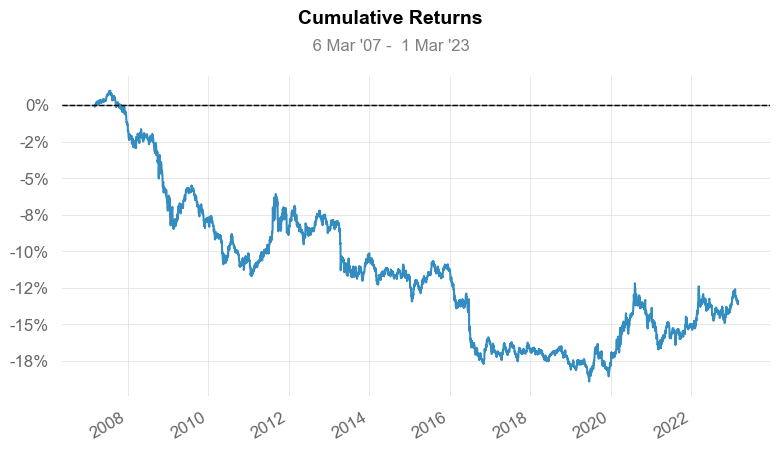

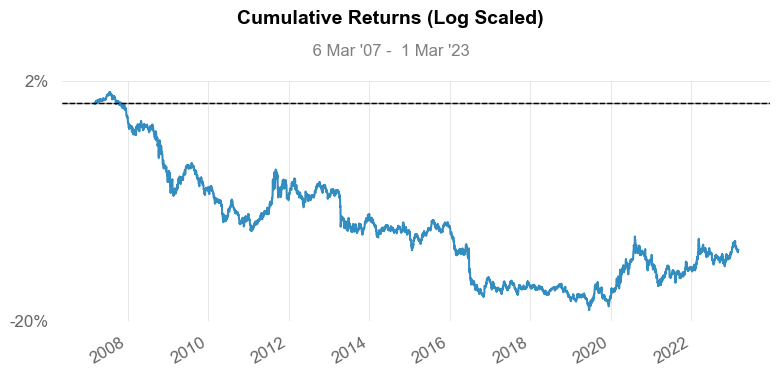

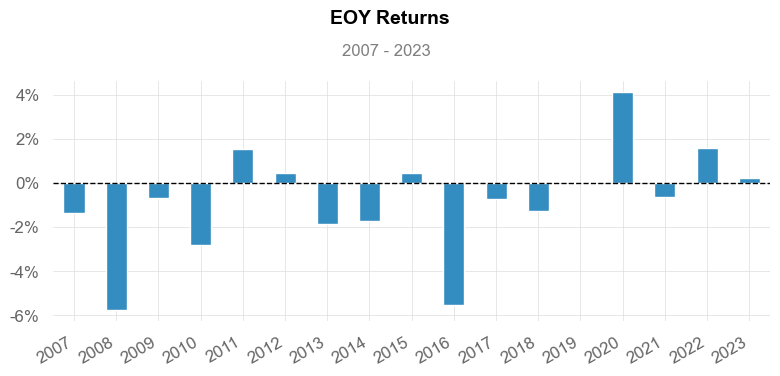

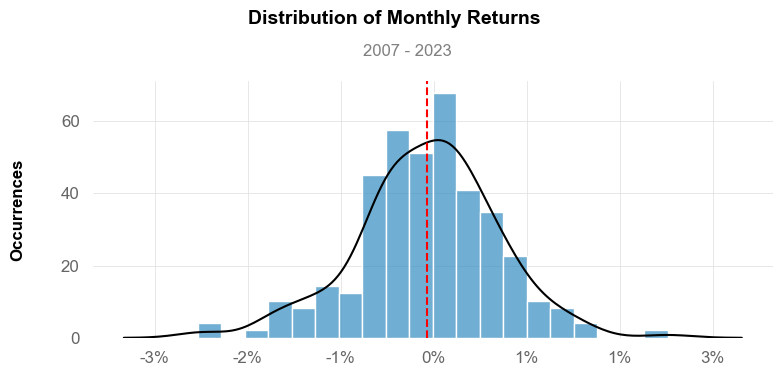

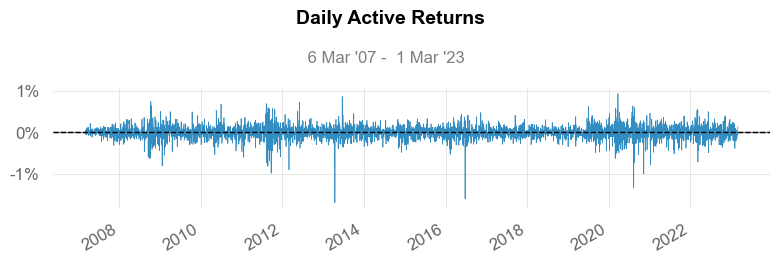

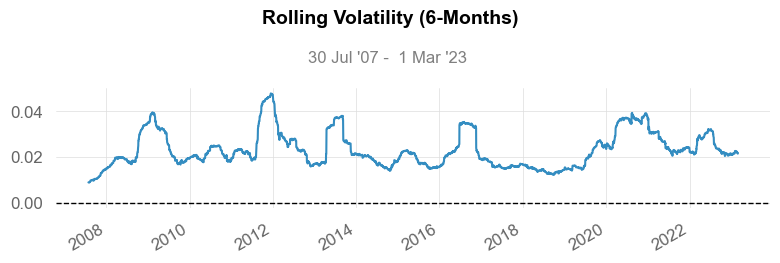

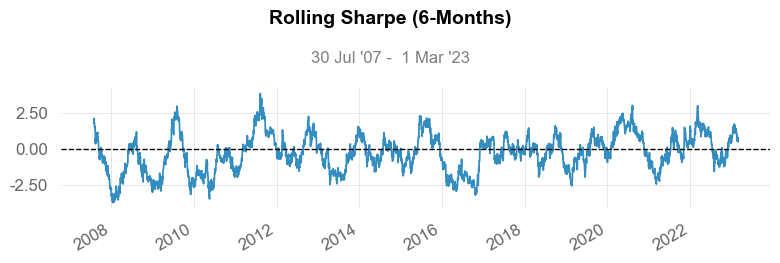

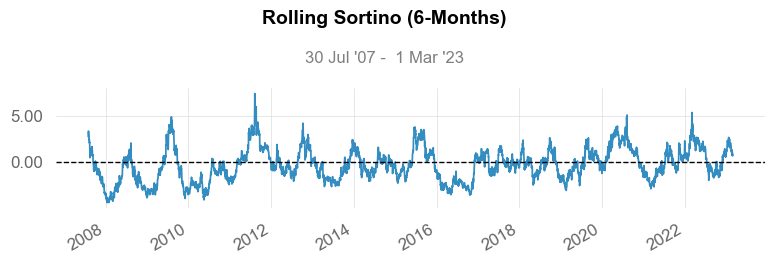

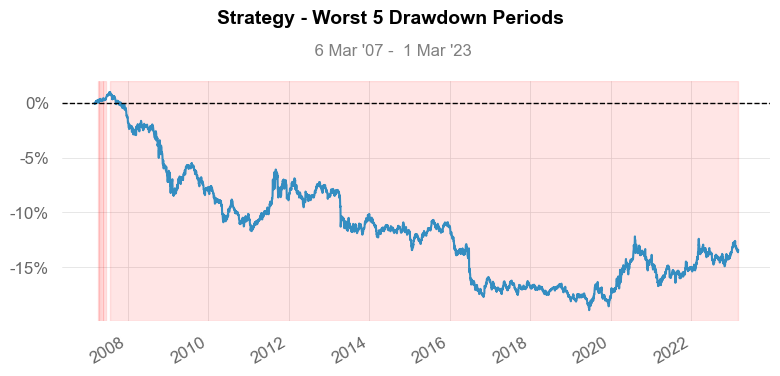

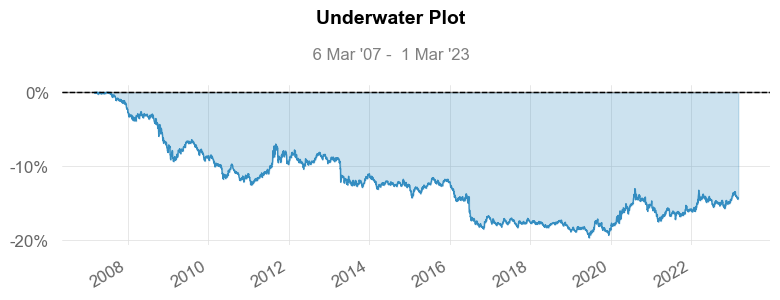

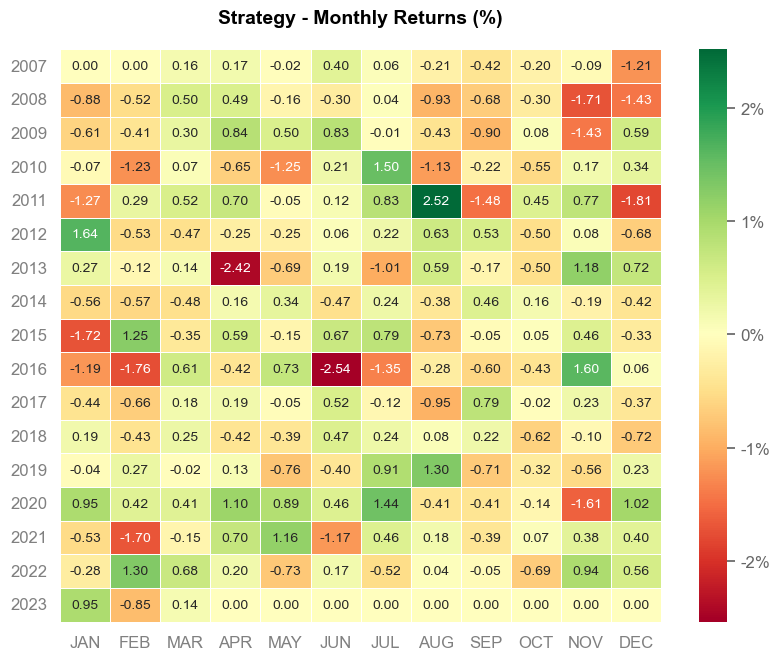

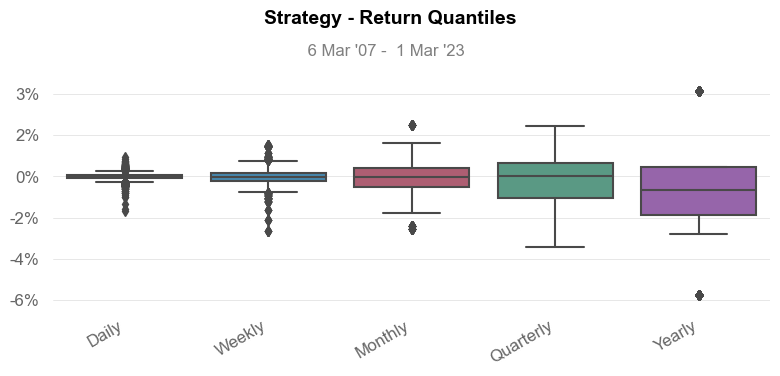

In [51]:
qs.reports.full(result['Equity'].resample('D').last().dropna().pct_change().resample('D').last().dropna())